# Previous notebook
In notebook 01, we solved the following problem:
```
x → y1 = w1*x + b1 → y = w2*y1 + b2
```

# This notebook
In this notebook 02, we will solve the following problem:
```
x ---→ y1 = w1*x + b1 ---→|
                          |---→ y = y1 + y2
x ---→ y2 = w2*x + b2 ---→|
```
The problem above can be represent as neural network with:
  + 1 Input layer (2 neurons)
  + 1 Output layer (1 neuron)
  + No hidden layers
  + No activation functions

---

Define training and testing dataset

In [1]:
x_train: list[float] = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y_train: list[float] = [10, 20, 30, 40, 50, 60, 70, 80, 90]
x_test: list[float] = [10, 11]
y_test: list[float] = [100, 110]

---

define the function `predict`

In [2]:
def predict(x: float, w1: float, b1: float, w2: float, b2: float) -> float:
    y1: float = w1*x + b1
    y2: float = w2*x + b2
    y = y1 + y2
    return y

---

Before training, the model just predict wrongly

In [3]:
def test():
    w1, b1, w2, b2 = 2, 3, 4, 5
    x: float = 6
    y_expect: float = 60
    y_pred: float = predict(x, w1, b1, w2, b2)
    print(f"x = {x}")
    print(f"pred = {y_pred}")
    print(f"expect = {y_expect}")
test()

x = 6
pred = 44
expect = 60


---

define the function `get_loss`

In [4]:
def get_loss(y_pred: float, y_expect: float) -> float:
    return (y_pred - y_expect) ** 2

---

call `get_loss` for `x = 6`

In [5]:
def test():
    w1, b1, w2, b2 = 2, 3, 4, 5
    x: float = 6
    y_expect: float = 60
    y_pred: float = predict(x, w1, b1, w2, b2)
    print(f"x = {x}")
    print(f"pred = {y_pred}")
    print(f"expect = {y_expect}")
    loss: float = get_loss(y_pred, y_expect)
    print(f"loss = {loss}")
test()

x = 6
pred = 44
expect = 60
loss = 256


---

- calculate the derivatives of `loss` w.r.t:
  + `w1`
  + `b1`
  + `w2`
  + `b2`
- Remind:
  + `y1 = w1*x + b1`
  + `y2 = w2*x + b2`
  + `y_pred = y1 + y2`
  + `loss = (y_pred - y_expect) ** 2`
- So:
  + `d_loss_y_pred = 2 * (y_pred - y_expect)`
  + `d_y_pred_y1 = 1`
  + `d_y_pred_y2 = 1`
  + `d_y1_w1 = x`
  + `d_y1_b1 = 1`
  + `d_y2_w2 = x`
  + `d_y2_b2 = 1`
  + `d_loss_w1 = d_loss_y_pred * d_y_pred_y1 * d_y1_w1`
  + `d_loss_b1 = d_loss_y_pred * d_y_pred_y1 * d_y1_b1`
  + `d_loss_w2 = d_loss_y_pred * d_y_pred_y2 * d_y2_w2`
  + `d_loss_b2 = d_loss_y_pred * d_y_pred_y2 * d_y2_b2`

In [6]:
def get_derivatives(
    x: float,
    w1: float,
    b1: float,
    w2: float,
    b2: float,
    y_expect: float,
) -> dict[str, float]:
    #
    y1: float = w1*x + b1
    y2: float = w2*x + b2
    y_pred = y1 + y2
    #
    d_loss_y_pred = 2 * (y_pred - y_expect)
    d_y_pred_y1 = 1
    d_y_pred_y2 = 1
    d_y1_w1 = x
    d_y1_b1 = 1
    d_y2_w2 = x
    d_y2_b2 = 1
    d_loss_w1 = d_loss_y_pred * d_y_pred_y1 * d_y1_w1
    d_loss_b1 = d_loss_y_pred * d_y_pred_y1 * d_y1_b1
    d_loss_w2 = d_loss_y_pred * d_y_pred_y2 * d_y2_w2
    d_loss_b2 = d_loss_y_pred * d_y_pred_y2 * d_y2_b2
    return {
        "d_loss_w2": d_loss_w2,
        "d_loss_b2": d_loss_b2,
        "d_loss_w1": d_loss_w1,
        "d_loss_b1": d_loss_b1,
    }

---

define the function `get_loss_from_x`

In [7]:
def get_loss_from_x(
    x: float,
    w1: float,
    b1: float,
    w2: float,
    b2: float,
    y_expect: float,
) -> float:
    y_pred: float = predict(x, w1, b1, w2, b2)
    loss: float = get_loss(y_pred, y_expect)
    return loss

---

define the function `get_derivatives_slow`

In [8]:
def get_derivatives_slow(
    x: float,
    w1: float,
    b1: float,
    w2: float,
    b2: float,
    y_expect: float,
) -> dict[str, float]:
    small: float = 0.001
    loss = get_loss_from_x(x, w1, b1, w2, b2, y_expect)
    d_loss_w2 = (get_loss_from_x(x, w1, b1, w2+small, b2, y_expect) - loss)/small
    d_loss_b2 = (get_loss_from_x(x, w1, b1, w2, b2+small, y_expect) - loss)/small
    d_loss_w1 = (get_loss_from_x(x, w1+small, b1, w2, b2, y_expect) - loss)/small
    d_loss_b1 = (get_loss_from_x(x, w1, b1+small, w2, b2, y_expect) - loss)/small
    return {
    "d_loss_w2": d_loss_w2,
    "d_loss_b2": d_loss_b2,
    "d_loss_w1": d_loss_w1,
    "d_loss_b1": d_loss_b1,
}

---

call `get_derivatives` and `get_derivatives_slow` for `x = 6`

In [9]:
def test():
    w1, b1, w2, b2 = 2, 3, 4, 5
    x = 6
    y_expect = 60
    derivatives: dict[str, float] = get_derivatives(x, w1, b1, w2, b2, y_expect)
    print(derivatives)
    derivatives_slow: dict[str, float] = get_derivatives_slow(x, w1, b1, w2, b2, y_expect)
    print(derivatives_slow)
test()

{'d_loss_w2': -192, 'd_loss_b2': -32, 'd_loss_w1': -192, 'd_loss_b1': -32}
{'d_loss_w2': -191.9640000000129, 'd_loss_b2': -31.99900000015532, 'd_loss_w1': -191.9640000000129, 'd_loss_b1': -31.998999999927946}


---

- train `w1`, `b1`, `w2`, `b2` for only 1 data point:
  + x = 6
  + y_expect = 60

{'w1': 3.297297297297298, 'b1': 3.216216216216216, 'w2': 5.2972972972972965, 'b2': 5.216216216216217}


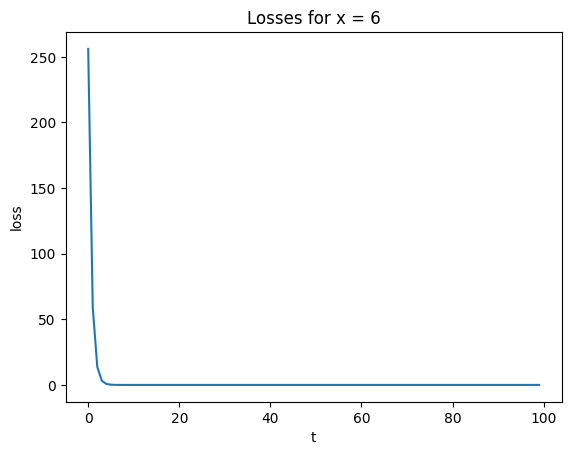

In [10]:
import matplotlib.pyplot as plt
def train() -> tuple[dict[str, float], list[float]]:
    w1, b1, w2, b2 = 2, 3, 4, 5
    x = 6
    y_expect = 60
    learning_rate = 0.01
    losses: list[float] = []
    for _ in range(100):
        loss = get_loss_from_x(x, w1, b1, w2, b2, y_expect)
        losses.append(loss)
        derivatives: dict[str, float] = get_derivatives(x, w1, b1, w2, b2, y_expect)
        w1 -= learning_rate * derivatives['d_loss_w1']
        b1 -= learning_rate * derivatives['d_loss_b1']
        w2 -= learning_rate * derivatives['d_loss_w2']
        b2 -= learning_rate * derivatives['d_loss_b2']
    return ({
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2,
    }, losses)

def test(losses: list[float]):
    # Add title and labels
    plt.title('Losses for x = 6')
    plt.xlabel('t')
    plt.ylabel('loss')

    # Create the plot
    plt.plot(losses)

wb, losses = train()
print(wb)

test(losses)

---

predict with `x = 6` and `x = 1`

In [11]:
import numpy as np
def test(x: float, y_expect: float):
    w1: float = wb["w1"]
    b1: float = wb["b1"]
    w2: float = wb["w2"]
    b2: float = wb["b2"]
    y_pred: float = predict(x, w1, b1, w2, b2)
    dict = {
        "x": x,
        "y_expect": y_expect,
        "y_pred": y_pred,
        "close": np.isclose(y_expect, y_pred),
    }
    print(dict)
test(6, 60)
test(1, 10)

{'x': 6, 'y_expect': 60, 'y_pred': 59.99999999999999, 'close': True}
{'x': 1, 'y_expect': 10, 'y_pred': 17.027027027027025, 'close': False}


---

plot the `expect` points and `predict` points

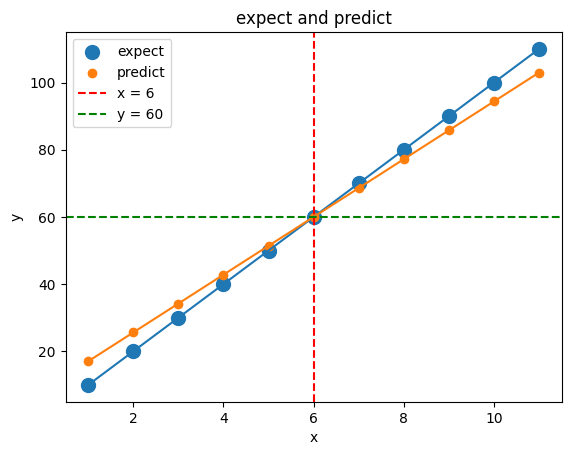

In [12]:
import matplotlib.pyplot as plt

def plot_expect_and_predict():
    xs: list[float] = x_train + x_test
    ys: list[float] = y_train + y_test

    # Add title and labels
    plt.title('expect and predict')
    plt.xlabel('x')
    plt.ylabel('y')

    # expect points
    plt.plot(xs, ys)
    plt.scatter(xs, ys, label='expect', s=100)

    # predict points
    
    w1: float = wb["w1"]
    b1: float = wb["b1"]
    w2: float = wb["w2"]
    b2: float = wb["b2"]

    y_pred: list[float] = []

    for x in xs:
        y = predict(x, w1, b1, w2, b2)
        y_pred.append(y)
    
    plt.plot(xs, y_pred)
    plt.scatter(xs, y_pred, label='predict')

    plt.axvline(x=6, color='r', linestyle='--', label='x = 6')
    plt.axhline(y=60, color='g', linestyle='--', label='y = 60')

    plt.legend()

plot_expect_and_predict()

---

- We trained only using `x = 6` and `y = 60`.
- But we want to train using entire data points.
- So, we just need to calculate the `average of the loss` and the `average of the derivative`

In [13]:
def get_loss_from_batch(
    xs: list[float],
    w1: float,
    b1: float,
    w2: float,
    b2: float,
    ys: list[float],
) -> float:
    loss = 0
    for i in range(len(xs)):
        loss += get_loss_from_x(xs[i], w1, b1, w2, b2, ys[i])
    return loss / len(xs)

In [14]:
def get_derivatives_batch(
    xs: list[float],
    w1: float,
    b1: float,
    w2: float,
    b2: float,
    ys: list[float],
) -> dict[str, float]:
    d_loss_w1_sum = 0
    d_loss_b1_sum = 0
    d_loss_w2_sum = 0
    d_loss_b2_sum = 0
    for i in range(len(xs)):
        derivatives: dict[str, float] = get_derivatives(xs[i], w1, b1, w2, b2, ys[i])
        d_loss_w1_sum += derivatives['d_loss_w1']
        d_loss_b1_sum += derivatives['d_loss_b1']
        d_loss_w2_sum += derivatives['d_loss_w2']
        d_loss_b2_sum += derivatives['d_loss_b2']
    
    return {
        "d_loss_w2": d_loss_w2_sum / len(xs),
        "d_loss_b2": d_loss_b2_sum / len(xs),
        "d_loss_w1": d_loss_w1_sum / len(xs),
        "d_loss_b1": d_loss_b1_sum / len(xs),
    }

---

train the model with the entire batch (not just 1 data point)

{'w1': 3.999824933746156, 'b1': -0.9988984378281914, 'w2': 5.99982493374616, 'b2': 1.00110156217181}


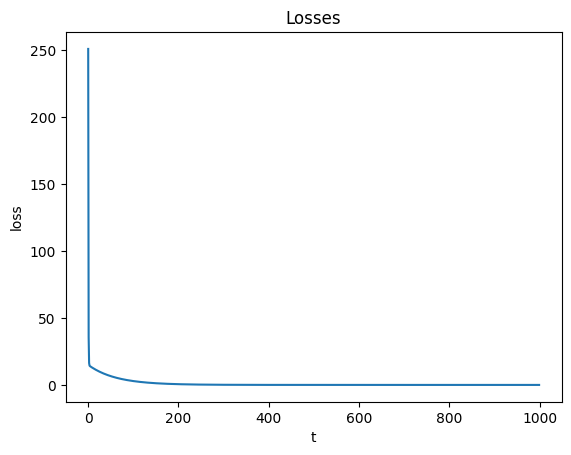

In [15]:
import matplotlib.pyplot as plt
def train() -> tuple[dict[str, float], list[float]]:
    w1, b1, w2, b2 = 2, 3, 4, 5
    learning_rate = 0.01
    losses: list[float] = []
    for _ in range(1000):
        loss = get_loss_from_batch(x_train, w1, b1, w2, b2, y_train)
        losses.append(loss)
        derivatives: dict[str, float] = get_derivatives_batch(x_train, w1, b1, w2, b2, y_train)
        w1 -= learning_rate * derivatives['d_loss_w1']
        b1 -= learning_rate * derivatives['d_loss_b1']
        w2 -= learning_rate * derivatives['d_loss_w2']
        b2 -= learning_rate * derivatives['d_loss_b2']
    return ({
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2,
    }, losses)

def test(losses: list[float]):
    # Add title and labels
    plt.title('Losses')
    plt.xlabel('t')
    plt.ylabel('loss')

    # Create the plot
    plt.plot(losses)

wb, losses = train()
print(wb)

test(losses)

---

plot the expect and predict

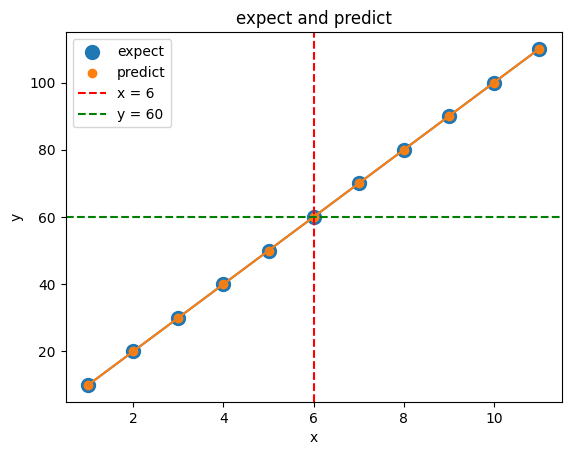

In [16]:
plot_expect_and_predict()